In [1]:
from os import listdir
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Only Run when new data is available (takes some time to run)

In [4]:
START = datetime.now()

files = [file for file in listdir('Excel') if file[0:11] =="EM_clusters"]
cluster_0 = pd.DataFrame(columns=['block_try_counter_mean',
 'block_try_counter_std',
 'clippy_hint_mean',
 'clippy_hint_std',
 'interval_mean',
 'interval_std',
 'scores_mean',
 'scores_std',
 'stars_mean',
 'stars_std',
 'size'])

cluster_1 = pd.DataFrame(columns=['block_try_counter_mean',
 'block_try_counter_std',
 'clippy_hint_mean',
 'clippy_hint_std',
 'interval_mean',
 'interval_std',
 'scores_mean',
 'scores_std',
 'stars_mean',
 'stars_std',
 'size'])

for i in range(len(files)):
    print('{}/{}'.format(i, len(files)), end='\r')
    df = pd.read_excel("Excel\{}".format(files[i]), index_col=0).transpose()

    df['timestamp'] = files[i][-20:-5]

    cluster_0 = cluster_0.append(df.iloc[0], ignore_index=True)
    cluster_1 = cluster_1.append(df.iloc[1], ignore_index=True)

print('this took:', datetime.now()-START)



this took: 0:03:41.808914


In [5]:
cluster_0.to_csv("cluster_0_over_time.csv", sep=';')
cluster_1.to_csv("cluster_1_over_time.csv", sep=';')

# Load data that was previously made

In [6]:
cluster_0 = pd.read_csv("cluster_0_over_time.csv", delimiter=';')
cluster_1 = pd.read_csv("cluster_1_over_time.csv", delimiter=';')

In [7]:
x_axis = list(cluster_0.index.values) 
cluster_0


,Unnamed: 0,block_try_counter_mean,block_try_counter_std,clippy_hint_mean,clippy_hint_std,interval_mean,interval_std,scores_mean,scores_std,stars_mean,stars_std,size,timestamp
0,0,0.0000,0.0000,0.0000,0.0000,-0.6839,0.2722,0.0000,0.0000,0.0000,0.0000,15.0,20211006-144712
1,1,0.0000,0.0000,0.0000,0.0000,-0.6839,0.2722,0.0000,0.0000,0.0000,0.0000,15.0,20211006-144722
2,2,0.4994,1.2618,0.2677,1.0304,-0.5181,0.5937,-1.0424,0.8082,-1.0104,0.9597,47.0,20211006-145050
3,3,0.0000,0.0000,0.0000,0.0000,2.0220,0.3812,0.0000,0.0000,0.0000,0.0000,15.0,20211020-084707
4,4,0.0000,0.0000,0.0000,0.0000,2.0220,0.3812,0.0000,0.0000,0.0000,0.0000,15.0,20211020-085639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8039,8039,-0.1032,0.2469,0.0205,0.9592,-0.1473,0.8628,-0.0187,0.8859,-0.2385,0.5518,607.0,20211117-114603
8040,8040,-0.1032,0.2469,0.0205,0.9592,-0.1473,0.8628,-0.0187,0.8859,-0.2385,0.5518,607.0,20211117-115033
8041,8041,-0.1032,0.2469,0.0205,0.9592,-0.1473,0.8628,-0.0187,0.8859,-0.2385,0.5518,607.0,20211117-115533
8042,8042,-0.1032,0.2469,0.0205,0.9592,-0.1473,0.8628,-0.0187,0.8859,-0.2385,0.5519,607.0,20211117-120116


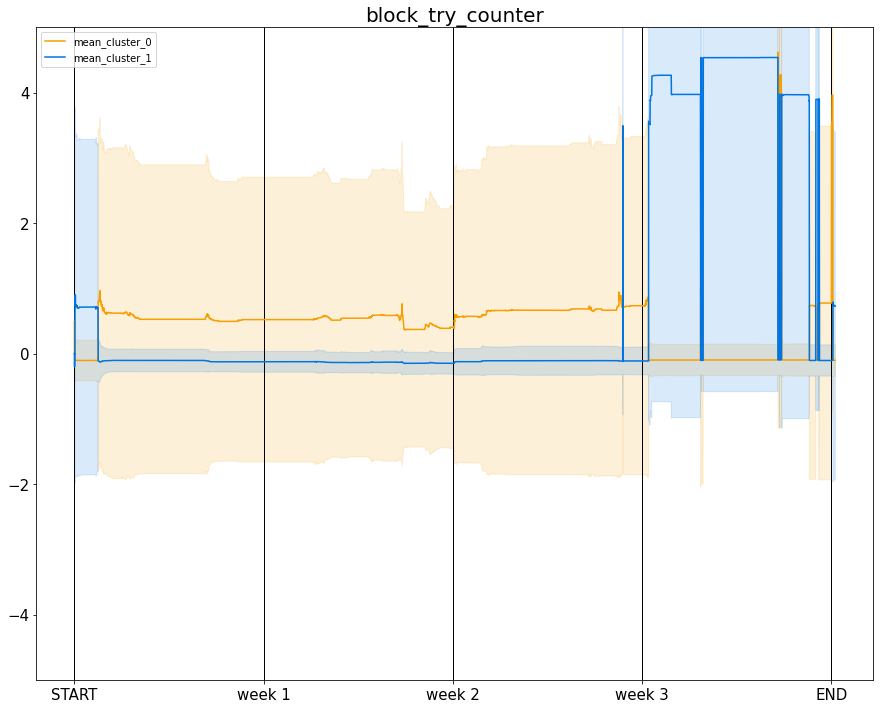

In [139]:
def plot_with_intervals(title, color1, color2):
    test = cluster_0[['{}_mean'.format(title), '{}_std'.format(title),'timestamp']]
    test['low'], test['high'] = test['{}_mean'.format(title)]-test['{}_std'.format(title)], test['{}_mean'.format(title)]+test['{}_std'.format(title)]
    test

    test1 = cluster_1[['{}_mean'.format(title), '{}_std'.format(title), 'timestamp']]
    test1['low'], test1['high'] = test1['{}_mean'.format(title)]-test1['{}_std'.format(title)], test1['{}_mean'.format(title)]+test1['{}_std'.format(title)]
    test1

    figure(figsize=(15,12))
    plt.title(title, fontsize=20)

    plt.ylim(-5,5)
    plt.vlines([0,2000,4000,6000,8000],-5,5, color='black', linewidth=1)
        
    plt.plot(x_axis,test['{}_mean'.format(title)], color=color1, label='mean_cluster_0')
    plt.plot(x_axis,test['high'], color='#608BFC',linewidth=0)
    plt.plot(x_axis,test['low'], color='#608BFC',linewidth=0)
    plt.fill_between(x_axis, test['high'], test['low'], alpha=0.15, color=color1)

    plt.plot(x_axis,test1['{}_mean'.format(title)], color=color2, label='mean_cluster_1')
    plt.plot(x_axis,test1['high'], color='#FC6060',linewidth=0)
    plt.plot(x_axis,test1['low'], color='#FC6060',linewidth=0)
    plt.fill_between(x_axis, test1['high'], test1['low'], alpha=0.15, color=color2)

    plt.xticks([0,2000,4000,6000,8000], ['START','week 1','week 2','week 3','END'],fontsize=15)
    plt.yticks(fontsize=15)
   

    
    plt.legend()
    
    plt.savefig("plot_over_time_{}.png".format(title))


color1 = '#F79E02'
color2 = '#0074E1'

plot_with_intervals("block_try_counter", color1, color2)

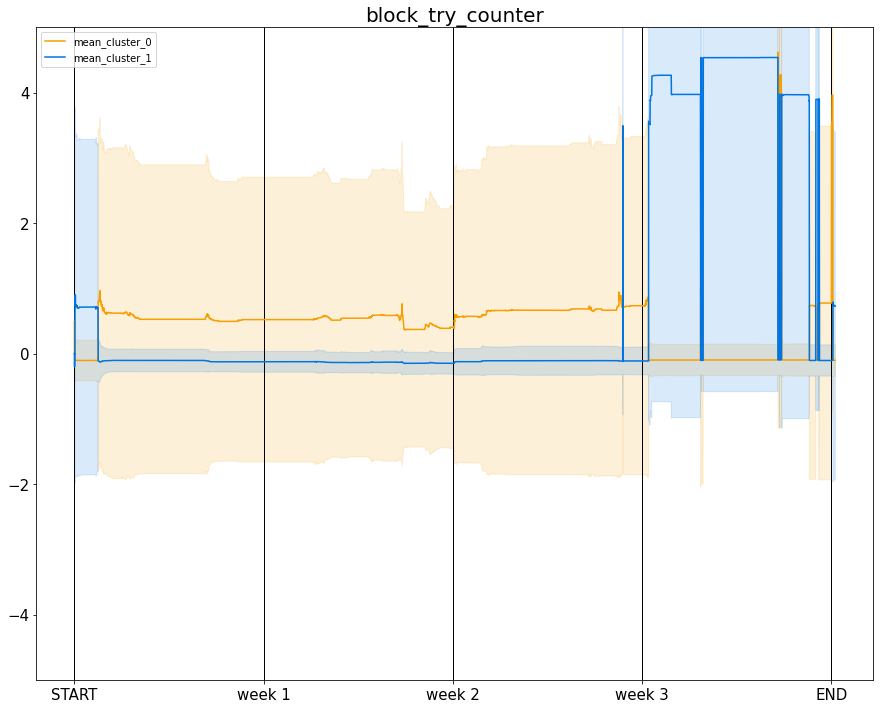

In [140]:
plot_with_intervals("block_try_counter", color1, color2)

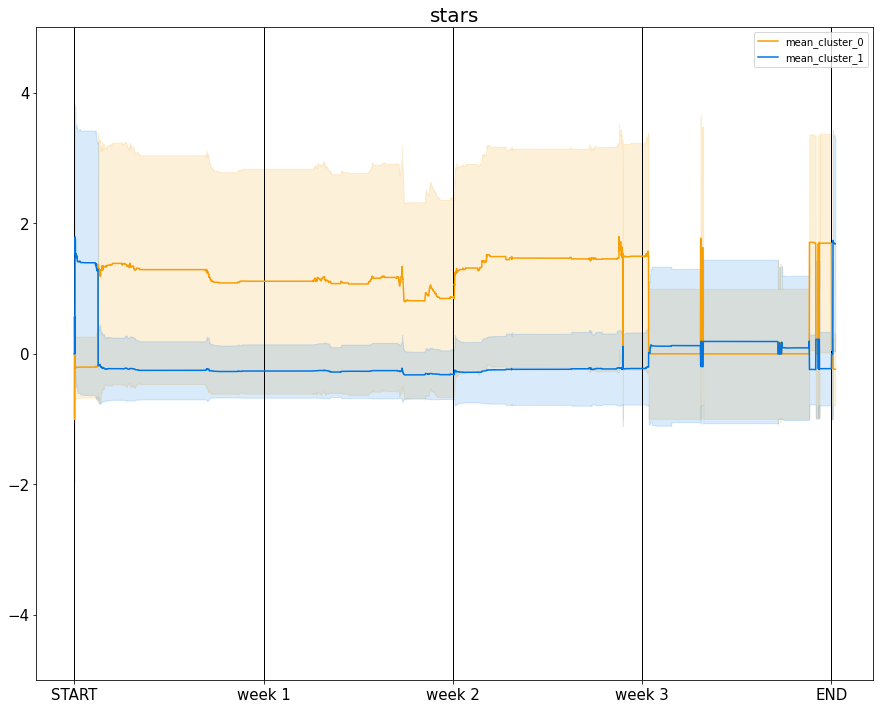

In [141]:
plot_with_intervals("stars", color1, color2)

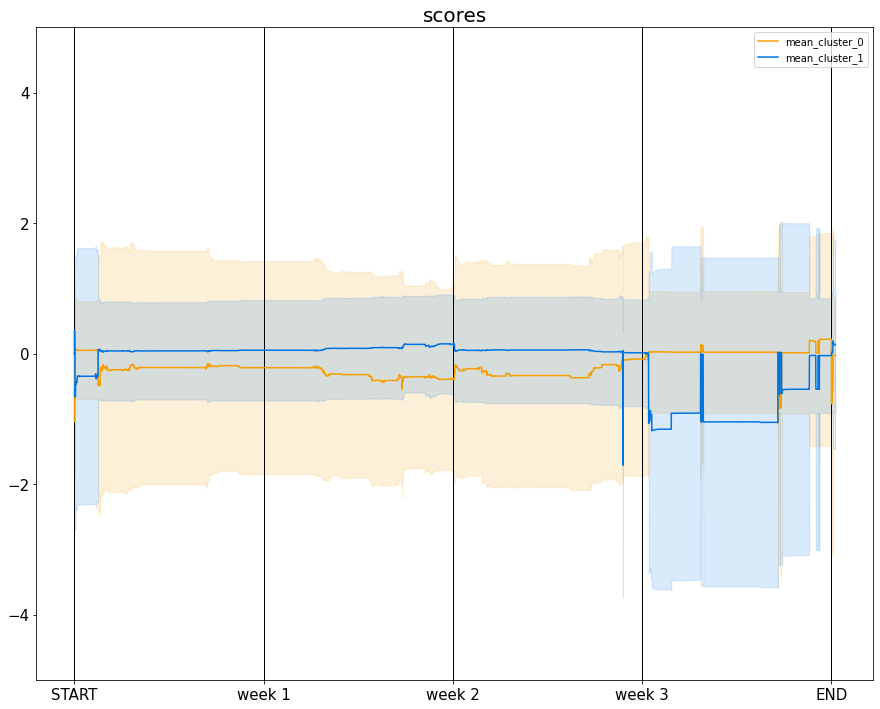

In [142]:
plot_with_intervals("scores", color1, color2)

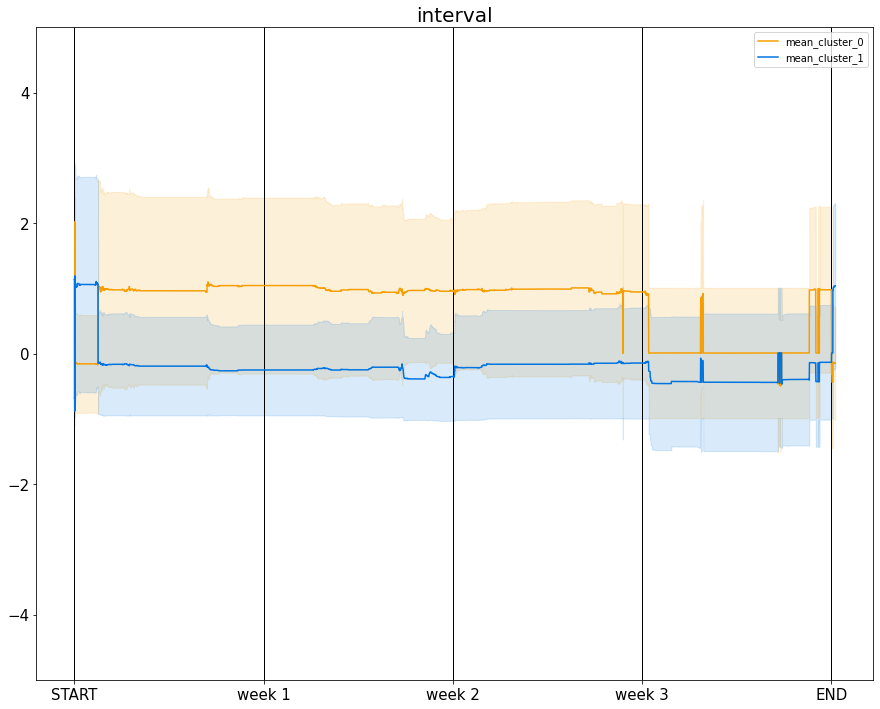

In [143]:
plot_with_intervals("interval", color1, color2)

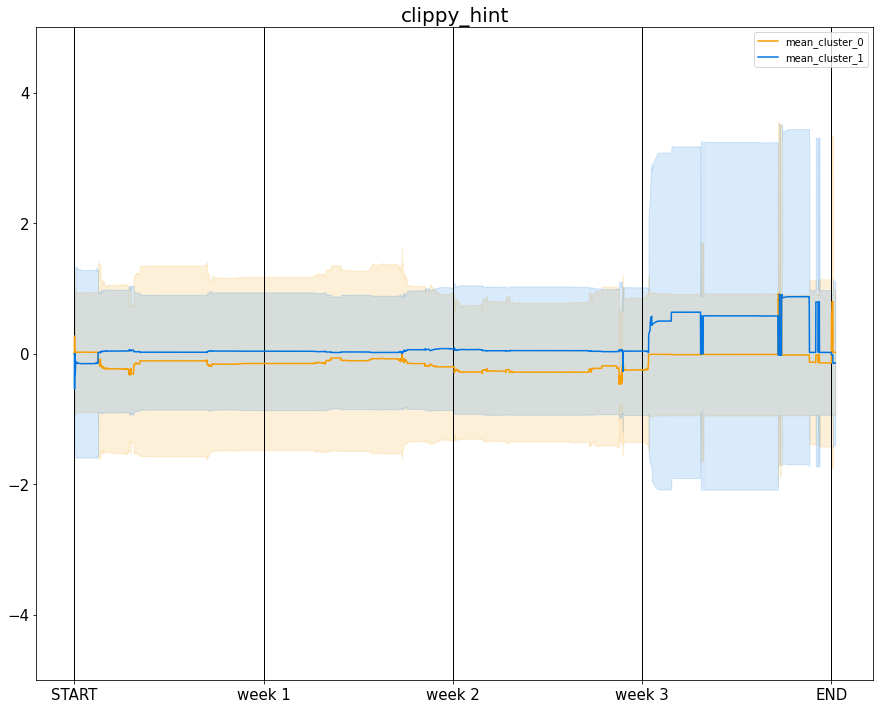

In [144]:
plot_with_intervals("clippy_hint", color1, color2)

In [149]:
cluster_0['size']

0        15.0
1        15.0
2        47.0
3        15.0
4        15.0
        ...  
8039    607.0
8040    607.0
8041    607.0
8042    607.0
8043    607.0
Name: size, Length: 8044, dtype: float64

<AxesSubplot:>

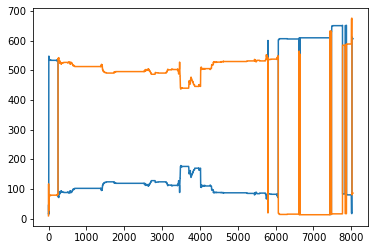

In [150]:
cluster_0['size'].plot()
cluster_1['size'].plot()

In [162]:
# 0 = small cluster and 1 = large cluster
probeer = pd.DataFrame(columns = ["1","2"])

probeer["1"] = cluster_0['size']
probeer["2"] = cluster_1['size']

probeer

,1,2
0,15.0,9.0
1,15.0,9.0
2,47.0,117.0
3,15.0,27.0
4,15.0,27.0
...,...,...
8039,607.0,86.0
8040,607.0,86.0
8041,607.0,86.0
8042,607.0,86.0


In [164]:
probeer['values']=-1
if probeer['2']>probeer['1']:
    print("ola")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().